# Exemplo - Aprendizado por Reforço


In [2]:
# instalar/inicializar bibliotecas 
!pip install gymnasium[toy_text] imageio
import numpy as np
import gymnasium as gym
import imageio
from IPython.display import Image
from gymnasium.utils import seeding

# inicializar ambiente "taxi"
env = gym.make("Taxi-v3", render_mode='rgb_array')

# setar a seed aleatória
env.np_random, _ = seeding.np_random(42)
env.action_space.seed(42)
np.random.seed(42)

# número máximo de ações por ep de treino
max_actions = 500

  Using cached imageio-2.37.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached gymnasium-1.1.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
  Using cached pygame-2.6.1-cp313-cp313-win_amd64.whl.metadata (13 kB)
Using cached imageio-2.37.0-py3-none-any.whl (315 kB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.3/10.6 MB ? eta -:--:--
    --------------------------------------- 0.3/10.6 M

In [19]:
# parâmetros de treino
epsilon = 1.0
min_epsilon = 0.01
epsilon_decay = 0.001
alpha = 0.1  # Learning rate -- teste diferentes valores
gamma = 0.90 # Discount factor -- teste diferentes valores



# número de estados e ações no ambiente
num_states = env.observation_space.n
num_actions = env.action_space.n

# inicializar tabela de Q-valores com zeros
q_table = np.zeros((num_states, num_actions))

# função Epsilon-greedy -- Algoritmo!
def epsilon_greedy(state):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Explorar
    else:
        return np.argmax(q_table[state])  # Aproveitar

    
# função de atualização Q-learning
def q_learning_update(state, action, reward, next_state):
    old_value = q_table[state, action]
    next_max = max(q_table[next_state]) 
    q_table[state, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)

# lista para armazenar o retorno (recompensas) por episódio
episode_returns = []

# loop de treino
for episode in range(2000):
    state, info = env.reset()
    terminated = False
    total_reward = 0

    for i in range(max_actions):
        action = epsilon_greedy(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        q_learning_update(state, action, reward, next_state)
        state = next_state
        total_reward += reward
        if terminated:
          break
          
    episode_returns.append(total_reward)
    # decaimento no epsilon
    epsilon = max(min_epsilon, epsilon*epsilon_decay)

# derivando a política  
policy = {state: np.argmax(q_table[state]) for state in range(num_states)} 

## testando o comportamento do agente

# lista para os frames
frames = []
state, info = env.reset(seed=42)
frames.append(env.render())
episode_total_reward = 0
for i in range(16): # executar um máximo de 16 movimentos
    action = policy[state] 
    state, reward, terminated, truncated, info = env.step(action)
    episode_total_reward += reward
    frames.append(env.render())
    if terminated:
      break      

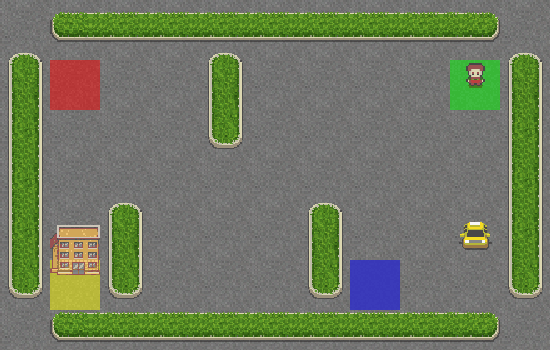

In [20]:
# visualizar o comportamento do agente através do ambiente
# salar frames enqunto GIF
imageio.mimsave('taxi_agent_behavior.gif', frames, fps=5)

# mostrar GIF
gif_path = "taxi_agent_behavior.gif" 
Image(gif_path) 